# i. Perkenalan

==================================================================================

Final Project 

Group 2 


Disusun Oleh : 
- Joenathant Tahtua (Fitur Engineering)
- Dwianti Hasanah (Data Scienties)
- Nurdin Atid H (Data Analyst)

Batch       : FTDS_BSD_2

Datasets    : Gold Price Tahun 2013-2023

===================================================================================

#### Pernyataan Masalah :
Perkembangan harga emas sangat penting untuk para investor, pelaku pasar, dan pihak terkait lainnya. Oleh karena itu, perlu adanya suatu metode forecasting yang dapat membantu dalam memprediksi pergerakan harga emas di masa mendatang. Pernyataan masalah yang muncul adalah bagaimana mengembangkan model forecasting yang akurat untuk memprediksi harga emas dengan mempertimbangkan berbagai faktor yang memengaruhi pergerakan harga tersebut.

#### Tujuan : 
 
Tujuan proyek ini adalah menghasilkan model forecasting yang handal untuk memprediksi pergerakan harga emas, memberikan dasar informasi yang kuat bagi para pemangku kepentingan.

### Penjabaran Masalah : 
- Pola pergerakan harga emas dari masa lampau dapat memberikan indikasi tentang tren masa depan. Bagaimana menganalisis dan memanfaatkan pola historis dalam merancang model forecasting?

#### Solusi yang Dilakukan :
Untuk menyelesaikan penjabaran masalah ini, kami akan menggunakan : 
- Model terbaik dengan membandingkan  Model Linear Regretion, Random Forest, Arima, Sarima, Smooth dan yang paling baik adalah Arima 

# ii. Import Libraries

In [1]:
# import Library
import pandas as pd
import matplotlib.pyplot as plt

# iii. Data Loading



Pada bagian ini kita akan menampilkan data dari csv lalu mengcopy data tersebut agar data asli tidak berubah.

In [2]:
# Load dataset
#import data yang sudah di download dari kaggle|com
gold_historical = pd.read_csv('gold_historical_data.csv')
gold = pd.read_csv('GOLD.csv')
kgc = pd.read_csv('KGC.csv')
nem = pd.read_csv('NEM.csv')
rgld = pd.read_csv('RGLD.csv')
sand = pd.read_csv('SAND.csv')


Menampilkan 10 data paling atas

In [3]:
# tampilkan sepuluh data paling atas dari gold_historical
gold_historical.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-01-02 00:00:00-05:00,1672.800049,1693.800049,1670.000000,1687.900024,35,0.0,0.0
1,2013-01-03 00:00:00-05:00,1686.099976,1686.800049,1662.000000,1673.699951,140,0.0,0.0
2,2013-01-04 00:00:00-05:00,1647.000000,1658.300049,1625.699951,1648.099976,199,0.0,0.0
3,2013-01-07 00:00:00-05:00,1656.500000,1659.900024,1643.800049,1645.500000,49,0.0,0.0
4,2013-01-08 00:00:00-05:00,1647.699951,1661.500000,1647.699951,1661.500000,17,0.0,0.0
5,2013-01-09 00:00:00-05:00,1658.599976,1662.099976,1651.900024,1654.800049,9,0.0,0.0
6,2013-01-10 00:00:00-05:00,1672.500000,1677.300049,1672.500000,1677.300049,9,0.0,0.0
7,2013-01-11 00:00:00-05:00,1673.099976,1673.099976,1654.199951,1660.000000,147,0.0,0.0
8,2013-01-14 00:00:00-05:00,1665.400024,1673.800049,1664.099976,1668.900024,10,0.0,0.0
9,2013-01-15 00:00:00-05:00,1671.599976,1684.300049,1671.599976,1683.400024,20,0.0,0.0


In [4]:
# tampilkan sepuluh data paling atas dari GOLD
gold.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-05,15.470000,15.820000,15.320000,15.430000,12.977592,16348300
1,2013-12-06,15.490000,15.680000,15.350000,15.400000,12.952355,13779400
2,2013-12-09,15.630000,16.160000,15.610000,16.000000,13.456996,17704600
3,2013-12-10,16.549999,17.000000,16.510000,16.870001,14.188725,21759600
4,2013-12-11,16.850000,16.879999,16.320000,16.379999,13.776601,15990000
5,2013-12-12,15.950000,16.510000,15.940000,16.459999,13.843886,15321000
6,2013-12-13,16.639999,16.980000,16.510000,16.740000,14.079384,15426700
7,2013-12-16,16.809999,17.230000,16.620001,17.049999,14.340106,15207800
8,2013-12-17,16.990000,17.240000,16.870001,17.200001,14.466271,15641100
9,2013-12-18,17.190001,17.379999,16.889999,16.910000,14.222366,22478500


Menampilkan 10 data paling bawah

In [5]:
# tampilkan sepuluh data paling atas dari NEM
nem.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-05,23.250000,23.690001,23.040001,23.200001,18.701796,11670500
1,2013-12-06,23.370001,23.559999,22.969999,23.020000,18.556690,11527900
2,2013-12-09,23.170000,23.680000,23.129999,23.600000,19.024240,8322100
3,2013-12-10,24.270000,24.570000,24.150000,24.180000,19.491789,10227300
4,2013-12-11,24.139999,24.139999,23.379999,23.469999,18.919445,8634900
5,2013-12-12,23.000000,23.430000,22.680000,23.280001,18.766279,11035700
6,2013-12-13,23.510000,23.549999,23.200001,23.280001,18.766279,8165300
7,2013-12-16,23.320000,23.580000,23.010000,23.160000,18.669550,11719500
8,2013-12-17,23.120001,23.360001,23.020000,23.110001,18.629240,8124700
9,2013-12-18,23.219999,23.650000,23.059999,23.139999,18.653427,12813700


In [6]:
# tampilkan sepuluh data paling atas RGLD
rgld.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-05,43.950001,44.779999,43.560001,43.959999,38.656544,1021000
1,2013-12-06,44.900002,45.259998,44.020000,44.150002,38.823620,715900
2,2013-12-09,44.310001,45.250000,44.180000,45.220001,39.764534,691600
3,2013-12-10,46.799999,48.950001,46.520000,47.500000,41.769478,1454800
4,2013-12-11,47.400002,47.770000,45.490002,45.580002,40.081104,824700
5,2013-12-12,44.770000,45.220001,44.099998,44.990002,39.562283,722000
6,2013-12-13,45.599998,45.889999,44.939999,45.320000,39.852478,447100
7,2013-12-16,45.450001,46.200001,45.230000,45.720001,40.204224,644500
8,2013-12-17,45.450001,46.080002,45.000000,45.490002,40.001972,526900
9,2013-12-18,45.540001,46.290001,44.660000,44.849998,39.439175,836000


In [7]:
# tampilkan sepuluh data paling atas SAND
sand.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-05,4.28,4.28,4.20,4.24,4.151607,527300
1,2013-12-06,4.30,4.34,3.95,4.01,3.926403,1652100
2,2013-12-09,4.02,4.10,4.01,4.09,4.004735,714600
3,2013-12-10,4.21,4.26,4.15,4.18,4.092858,786500
4,2013-12-11,4.21,4.21,4.04,4.09,4.004735,677900
5,2013-12-12,3.96,4.22,3.96,4.21,4.122232,624300
6,2013-12-13,4.20,4.31,4.16,4.20,4.112442,431600
7,2013-12-16,4.17,4.43,4.15,4.37,4.278897,419000
8,2013-12-17,4.33,4.40,4.19,4.26,4.171190,314300
9,2013-12-18,4.24,4.34,4.18,4.18,4.092858,361900


# iv. Exploratory Data Analysis (EDA)
Objective : 
ingin mengetahui bagaimana tren dari 
1. Time Series Plot for gold_hitorical Prices.
2. Time Series Plot for Gold Prices.
3. Time Series Plot for KGC Prices.
4. Time Series Plot for NEM Prices.
5. Time Series Plot for RGLD Prices.
6. Time Series Plot for SAND Prices.


1. Time Series Plot for gold_hitorical Prices:

In [9]:
# Asumsikan gold_historical adalah DataFrame Anda dengan kolom 'Date'
gold_historical['Date'] = pd.to_datetime(gold_historical['Date'], errors='coerce')

# Periksa apakah ada baris yang memiliki nilai NaT (Not a Time) setelah konversi
nan_rows = gold_historical[gold_historical['Date'].isna()]
if not nan_rows.empty:
    print("Peringatan: Beberapa baris memiliki nilai tanggal yang tidak valid.")

# Jika ada nilai NaT, Anda mungkin perlu memeriksa dan membersihkan data Anda.

# Selanjutnya, Anda dapat melanjutkan dengan memformat kolom 'Date'
gold_historical['Date'] = gold_historical['Date'].dt.strftime('%Y-%m-%d')

# Sekarang Anda seharusnya dapat menggunakan kolom 'Date' dengan akses .dt sesuai kebutuhan


Peringatan: Beberapa baris memiliki nilai tanggal yang tidak valid.


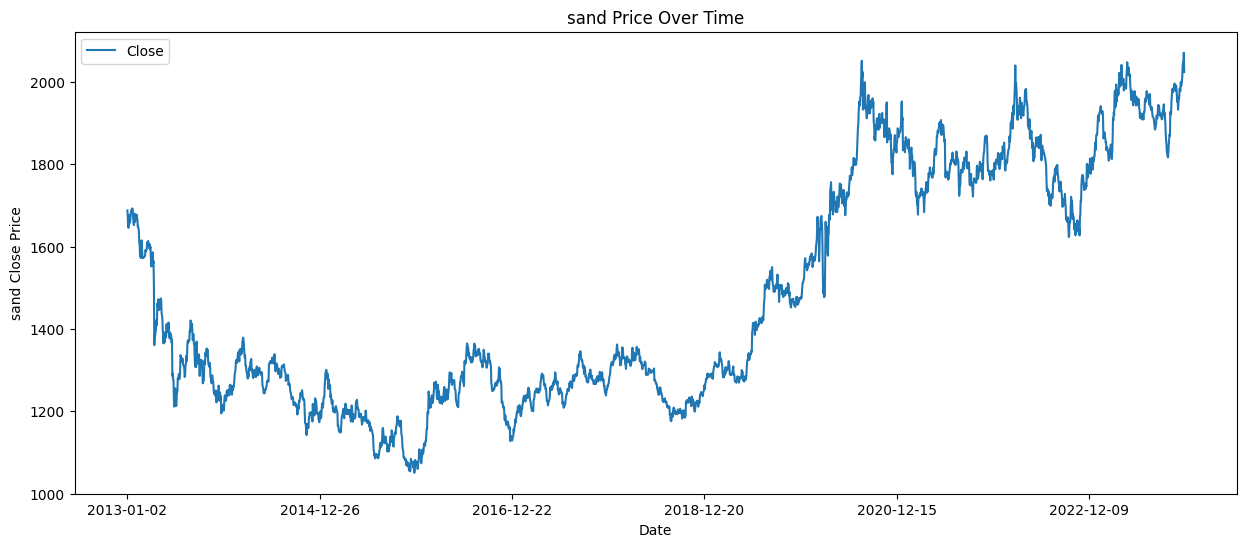

In [11]:
plt.figure(figsize=(15, 6))
gold_historical.set_index('Date')['Close'].plot(title='sand Price Over Time', xlabel='Date', ylabel='sand Close Price', legend=True)
plt.show()

Data harga emas yang kita miliki yaitu harga emas dari tahun 2013 samapi dengan tahun 2023 terdapat kenaikan harga namun tidak terlihat memiliki tren yang tetap karena di dalamnya terdapat penurunan dan kenaikan harga emas yang tidak teratur karena kemungkinan besar terdapat faktor faktor eksternal yang mengakibatkan itu terjadi. di tahun terakhir menunjukan perbedaan harga yang sangat signifikan perbandingan antara harga emas tahun 2013 dan harga emas tahun 2023.

2. Time Series Plot for Gold Prices:

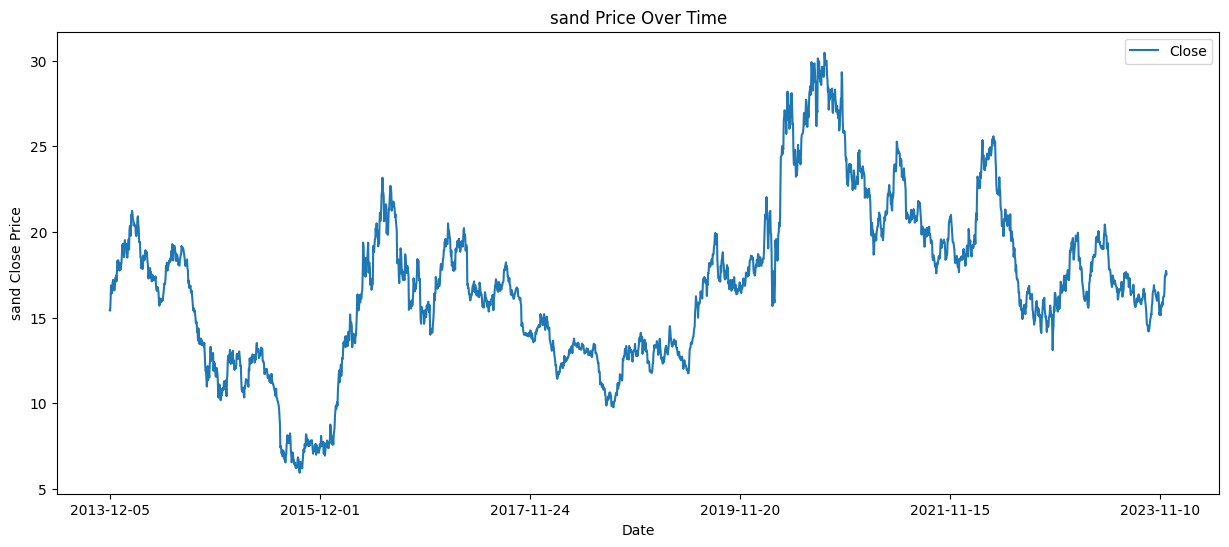

In [12]:
plt.figure(figsize=(15, 6))
gold.set_index('Date')['Close'].plot(title='sand Price Over Time', xlabel='Date', ylabel='sand Close Price', legend=True)
plt.show()

GOLD: barrick gold 
SAND: sandstormgold
RGLD: royal gold Inc.
KGC: kinross gold company
NEM:  newmont corp

Di perusahan Barrick Gold (GOLD) yang berasal dari canada dalam data yang kita dapatkan terdapat kenaikan harga di awal tahun 2013 namun selanjutnya terjadi penurunan harga tahun 2015 terdapat kenaikan harga yang signifikan selannutnya terdapat kenaikan dan penuruan harga yang tidak memiliki tren yang pasti, dilihat dari perbandingan harga di tahun 2013 dan 2023 tidak terlihat perbedaan yang terlalu jauh.

3. Time Series Plot for KGC Prices:

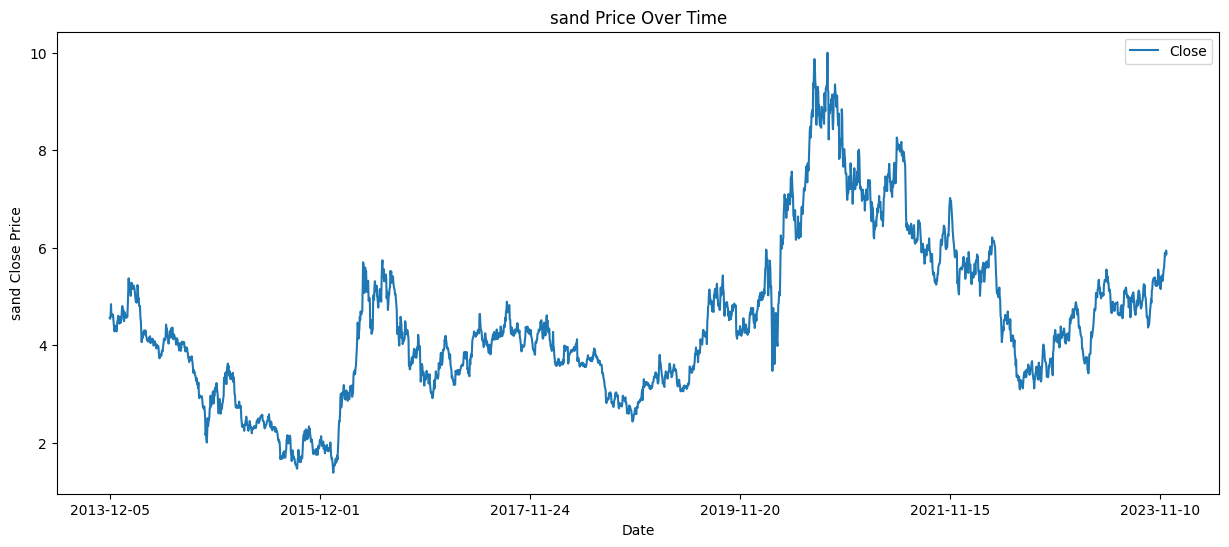

In [13]:
plt.figure(figsize=(15, 6))
kgc.set_index('Date')['Close'].plot(title='sand Price Over Time', xlabel='Date', ylabel='sand Close Price', legend=True)
plt.show()

4. Time Series Plot for NEM Prices:

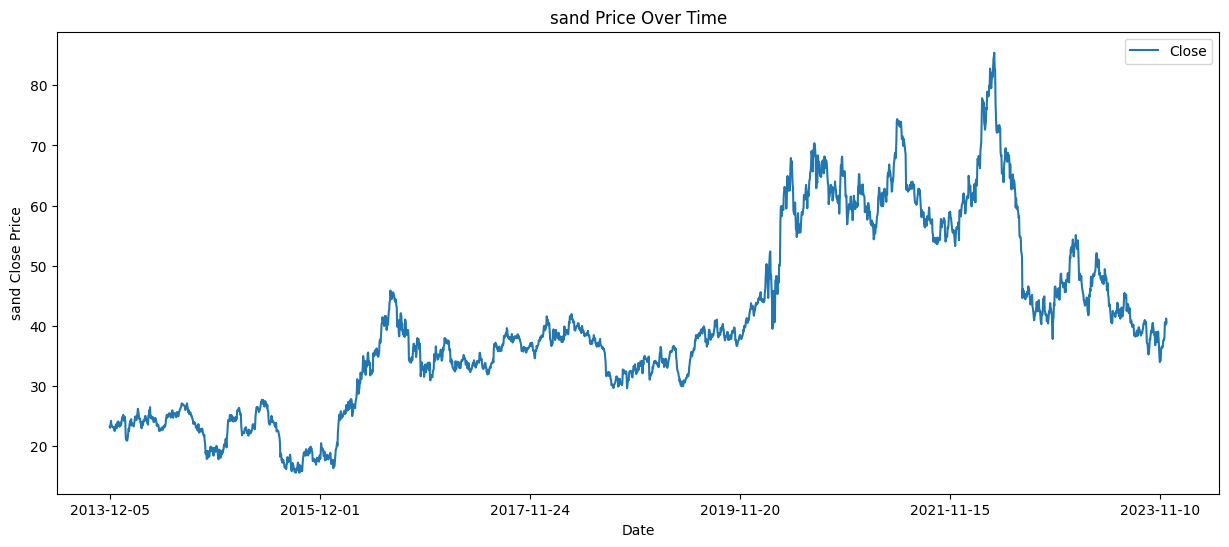

In [14]:
plt.figure(figsize=(15, 6))
nem.set_index('Date')['Close'].plot(title='sand Price Over Time', xlabel='Date', ylabel='sand Close Price', legend=True)
plt.show()

5. Time Series Plot for RGLD Prices:

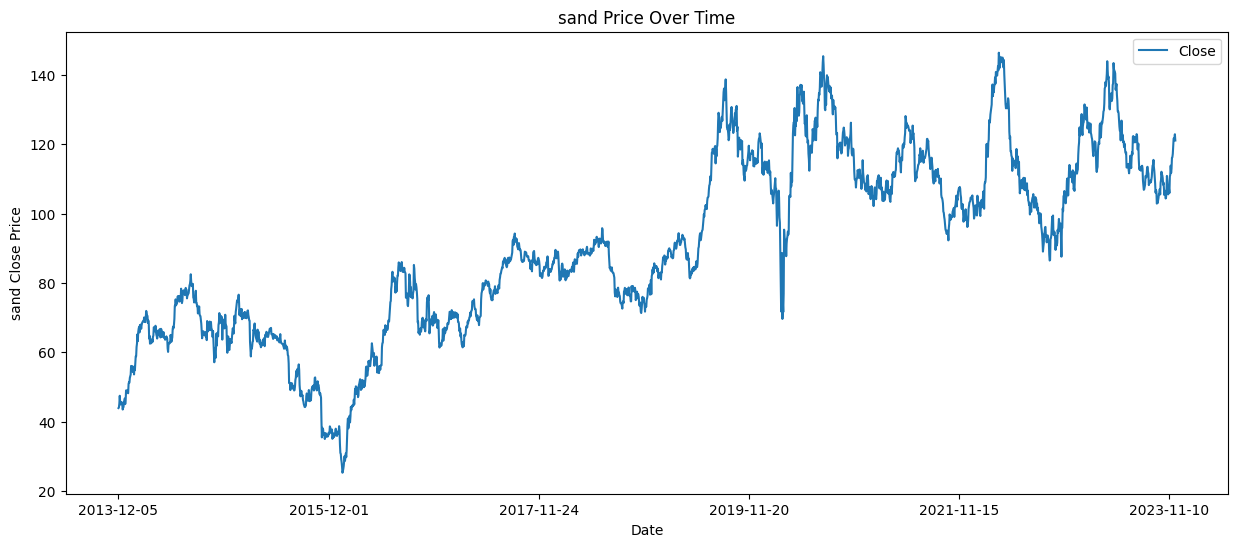

In [15]:
plt.figure(figsize=(15, 6))
rgld.set_index('Date')['Close'].plot(title='sand Price Over Time', xlabel='Date', ylabel='sand Close Price', legend=True)
plt.show()

6. Time Series Plot for SAND Prices:

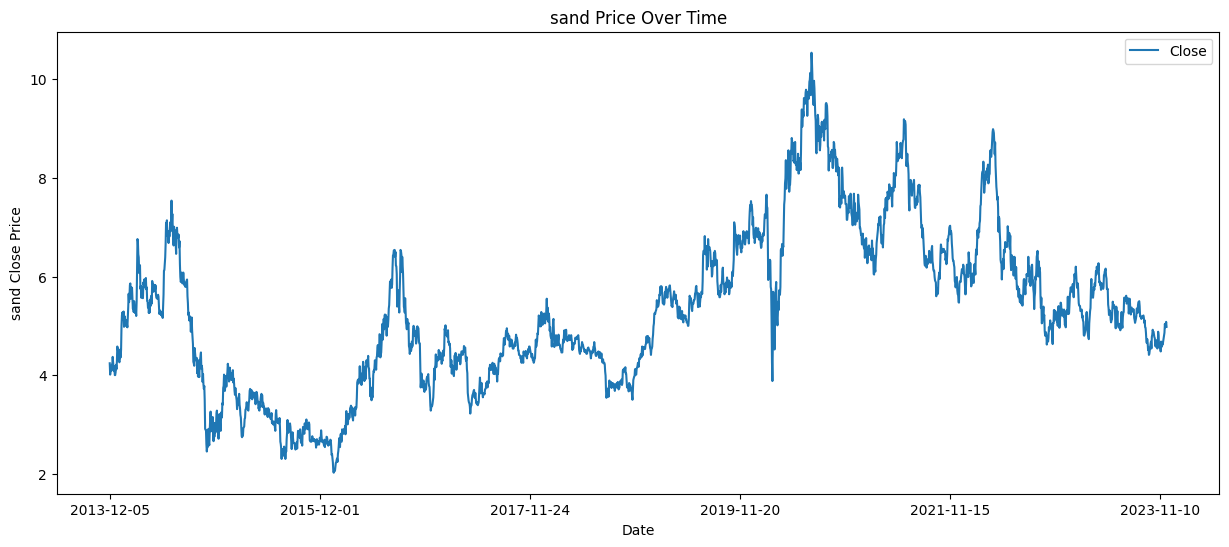

In [16]:
plt.figure(figsize=(15, 6))
sand.set_index('Date')['Close'].plot(title='sand Price Over Time', xlabel='Date', ylabel='sand Close Price', legend=True)
plt.show()